# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

C:\Users\Usuario\Anaconda3\envs\aceleradev_2020\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
countries['Region'] = countries['Region'] = countries['Region'].apply(lambda y: y.strip())

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
countries.tail()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"


In [7]:
countries.shape

(227, 20)

In [8]:
Geral  = pd.DataFrame({'Colunas': countries.columns, 
              'Tipo': countries.dtypes, 
              'Qtd NaN': countries.isna().sum(), 
              '% Qtd NaN': countries.isna().sum()/countries.shape[0],
              'Qtd Valores Únicos': countries.nunique()})
Geral 

,Colunas,Tipo,Qtd NaN,% Qtd NaN,Qtd Valores Únicos
Country,Country,object,0,0.000000,227
Region,Region,object,0,0.000000,11
Population,Population,int64,0,0.000000,227
Area,Area,int64,0,0.000000,226
Pop_density,Pop_density,object,0,0.000000,219
Coastline_ratio,Coastline_ratio,object,0,0.000000,151
Net_migration,Net_migration,object,3,0.013216,157
Infant_mortality,Infant_mortality,object,3,0.013216,220
GDP,GDP,float64,1,0.004405,130
Literacy,Literacy,object,18,0.079295,140


In [9]:
countries.describe()

,Population,Area,GDP
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


A tabela geral nos mostra diversas variáveis foram cadastradas com o tipo errada (são variáveis numéricas cadastradas como variáveis categóricas), comprovado pelo método describe que retorna valores apenas para variáveis numéricas. Provavelmente esse erro ocorreu devido ao uso do separador ',' ao invés do ponto.

In [10]:
for col in countries.select_dtypes(include='object').columns:
    countries[col] = countries[col].str.replace(',','.')

In [11]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [12]:
change_category = countries.select_dtypes(include='object').columns
change_category

Index(['Country', 'Region', 'Pop_density', 'Coastline_ratio', 'Net_migration',
       'Infant_mortality', 'Literacy', 'Phones_per_1000', 'Arable', 'Crops',
       'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service'],
      dtype='object')

In [13]:
change_category = ['Pop_density', 'Coastline_ratio', 'Net_migration',
       'Infant_mortality', 'Literacy', 'Phones_per_1000', 'Arable', 'Crops',
       'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service']

In [14]:
countries[change_category] = countries[change_category].astype('float64')

In [15]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [16]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [17]:
def q1():
    return list(sorted(countries['Region'].unique()))

In [18]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [19]:
def q2():
    #Instanciando a discretização em 10 intervalos utilizando encode ordinal e a esrtratégia quantile
    kbins_disc = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    #ajuste das variáveis da feature Pop_density
    kbins_disc.fit(countries[['Pop_density']])
    score = kbins_disc.transform(countries[["Pop_density"]])
    # Quantidade maiores que 90
    return score[score>=9].shape[0]

A binarização é uma operação comum em dados de contagem de texto em que o analista pode decidir considerar apenas a presença ou ausência de um recurso em vez de um número quantificado de ocorrências, por exemplo.

Também pode ser usado como uma etapa de pré-processamento para estimadores que consideram variáveis, aleatórias booleanas (por exemplo, modeladas usando a distribuição de Bernoulli em uma configuração bayesiana).

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [20]:
def q3():
    return  countries[['Region']].nunique(dropna=False)[0] + countries[['Climate']].nunique(dropna=False)[0]


In [21]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [22]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

#Dataframe de teste 
df_test_country = pd.DataFrame([test_country], columns=countries.columns)

df_test_country

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [23]:
# definindo o pipeline 
pipe = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
                       ('scaler', StandardScaler())])

#fit & transform
pipe.fit(countries.drop(columns=['Country','Region'], axis=1))
test_country_numeric = pipe.transform(df_test_country.drop(columns=['Country','Region'], axis=1))

In [24]:
df_test = pd.DataFrame(test_country_numeric, columns=df_test_country.drop(columns=['Country','Region'], axis=1).columns)
df_test

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [25]:
def q4():
    return round(df_test['Arable'][0],3)

In [26]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

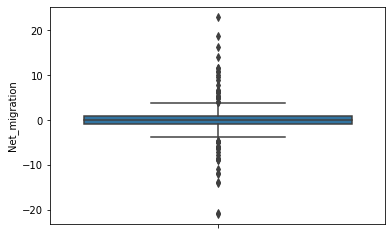

In [27]:
#Visualização utilizando boxplot
sns.boxplot(countries['Net_migration'], orient='vertical')

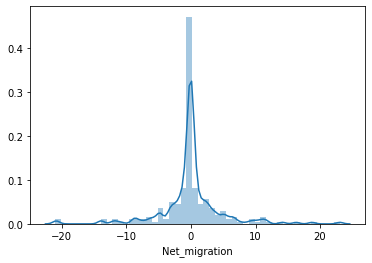

In [28]:
sns.distplot(countries['Net_migration']);

In [29]:
#primeiro quartil 0.25
qt1 = countries['Net_migration'].quantile(0.25)

#terceiro quartil 0.75
qt3 = countries['Net_migration'].quantile(0.75)

#Amplitude Interquartil
IQR = qt3 - qt1

In [30]:
#Ourliers Superiores
higher_outliers_point = qt3 + 1.5*IQR

#Ourliers Inferiores
lower_outliers_point = qt1 - 1.5*IQR

In [31]:
higher_outliers = countries[countries['Net_migration'] > higher_outliers_point]['Net_migration']
higher_outliers

0      23.06
4       6.60
6      10.76
11      3.98
28     10.01
36      5.96
38     18.75
70      6.27
91      5.24
98      4.99
99      5.36
105     6.59
111    14.18
119     4.85
121     8.97
122     4.86
134     6.78
138     7.75
149     4.05
153     9.61
166    16.29
177    10.98
184    11.53
188     5.37
196     4.05
208    11.68
Name: Net_migration, dtype: float64

In [32]:
#Registros abaixo do ponto lower_outlieres_point

lower_outliers = countries[countries['Net_migration'] < lower_outliers_point]['Net_migration']
lower_outliers 

1      -4.93
3     -20.71
7      -6.15
9      -6.47
13     -4.90
30     -4.58
37    -12.07
56    -13.87
59     -8.58
75     -4.70
80     -8.37
81    -13.92
102    -4.92
130    -6.04
135    -4.87
136   -20.99
172    -7.11
174    -4.86
175    -7.64
176   -11.70
182    -5.69
193    -8.81
204   -10.83
220    -8.94
Name: Net_migration, dtype: float64

In [33]:
#Registros abaixo do ponto lower_outlieres_point

higher_outliers = countries[countries['Net_migration'] > higher_outliers_point]['Net_migration']
higher_outliers

0      23.06
4       6.60
6      10.76
11      3.98
28     10.01
36      5.96
38     18.75
70      6.27
91      5.24
98      4.99
99      5.36
105     6.59
111    14.18
119     4.85
121     8.97
122     4.86
134     6.78
138     7.75
149     4.05
153     9.61
166    16.29
177    10.98
184    11.53
188     5.37
196     4.05
208    11.68
Name: Net_migration, dtype: float64

In [34]:
countries.shape

(227, 20)

In [35]:
total_outliers = len(higher_outliers) + len(lower_outliers)
total_outliers 

50

Cerca de 22% dos dados são outliers, portanto iria haver muita perda de informação se eles fossem excluídos

In [36]:
def q5():
    return(len(lower_outliers), len(higher_outliers),False)

In [37]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [38]:
from sklearn.datasets import fetch_20newsgroups

In [39]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

Para começar a usar o TfidfTransformer, primeiro você terá que criar um CountVectorizer para contar o número de palavras (termo frequência), limitar o tamanho do seu vocabulário, aplicar palavras de parada e etc

In [40]:
countvectorizer = CountVectorizer()

In [41]:
#Contagem das palavras no corpus
word_count_vector = countvectorizer.fit_transform(newsgroups.data)

In [42]:
#Verificando o tamanho (palavras presetes nos bancos)
word_count_vector.shape

(1773, 27335)

Significa que esse corpus possui 1773 documentos (número de linhas) e  27335 palavras únicas (número de colunas)

Agora vamos calcular os valores da IDF

In [43]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector) #tfidf ajustado de acordo com a contagem de palavras

TfidfTransformer()

In [44]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=countvectorizer.get_feature_names(),columns=["idf_weights"])
 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
from,1.000000
subject,1.000000
lines,1.000564
organization,1.028590
the,1.079761
...,...
maintainability,7.787845
backing,7.787845
maintainer,7.787845
backwrapped,7.787845


O dataframe acima indica o valor de idf para cada palavra em ordem crescente. Quanto menor o valor IDF de uma palavra, menos exclusivo é para qualquer documento em particular, por exemplo 'from' e subject aparece em todos os documentos

Depois de obter os valores do IDF, agora você pode calcular as pontuações tf-idf para qualquer documento ou conjunto de documentos.

In [45]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(newsgroups.data)

In [46]:
tfidf_transformer.fit(word_count_vector)
newsgroups_tfidf = tfidf_transformer.transform(word_count_vector)

In [47]:
#calculando tdif da palavra phone
tdif_phone = newsgroups_tfidf.getcol(countvectorizer.vocabulary_.get('phone')) 
tdif_phone.sum()

8.88774594667355

Encontrando a quantidade de palavras existentes em cada documento

In [48]:
fitted_vectorizer=tfidf_vectorizer.fit(newsgroups.data)
tfddidf_vectorizer_vectors=fitted_vectorizer.transform(newsgroups.data)

In [49]:
words_idx = sorted([countvectorizer.vocabulary_.get('phone')])
words = pd.DataFrame(word_count_vector.toarray(), columns=countvectorizer.get_feature_names())

In [50]:
words['phone'].sum()

213

In [51]:
def q6():
    return words['phone'].sum()

In [52]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [53]:
def q7():
    return round(tdif_phone.sum(),3)

In [54]:
q7()

8.888

In [55]:
tdif_phone.sum()

8.88774594667355